In [ ]:
## useful code bank for testing analysis that involve overlaying multiple trials onto same canvas
# good analysis code put elsewhere.

In [1242]:
""" goal: analysis of kineamtics of trials.
align multiople trials of same task.
assess statistics of actions
"""

%load_ext autoreload
%autoreload 2
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1410]:
animal = "Pancho";
date = 200226
expt = "pilot"
session = 1

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl


In [1411]:
from tools.utils import *
getMultTrialsTaskStages(filedata)

{'two_lines_natural': 20,
 'two_lines_anywhere': 256,
 'one_dot': 28,
 'circle_partial': 172,
 'line_natural': 6,
 'three_lines_natural': 19,
 'line': 116}

In [ ]:
#########################

dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
{'1': array([[3.]])}
{'tasklist': {'1': 'one_dot'}, 'numtasks': {'1': array([[3.]])}, 'MINLINELENGTH': {'1': array([], shape=(0, 0), dtype=float64)}, 'MAXLINELENGTH': {'1': array([], shape=(0, 0), dtype=float64)}}
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
{'1': array([[3.]])}
{'tasklist': {'1': 'one_dot'}, 'numtasks': {'1': array([[3.]])}, 'MINLINELENGTH': {'1': array([], shape=(0, 0), dtype=float64)}, 'MAXLINELENGTH': {'1': array([], shape=(0, 0), dtype=float64)}}
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
{'1': array([[3.]])}
{'tasklist': {'1': 'one_dot'}, 'numtasks': {'1': array([[3.]])}, 'MINLINELENGTH': {'1': array([], shape=(0, 0), dtype=float64)}, 'MAXLINELENGTH': {'1': array([], shape=(0, 0), dtype=float64)}}
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'ad

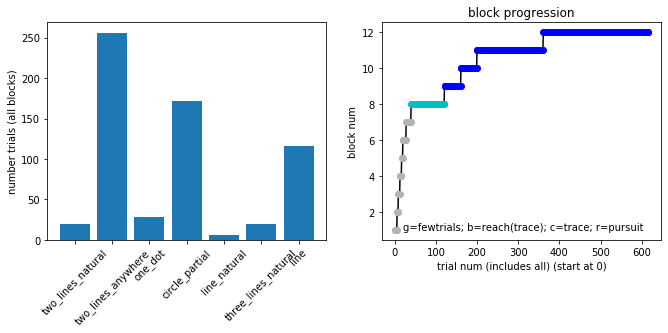

<Figure size 1080x360 with 0 Axes>

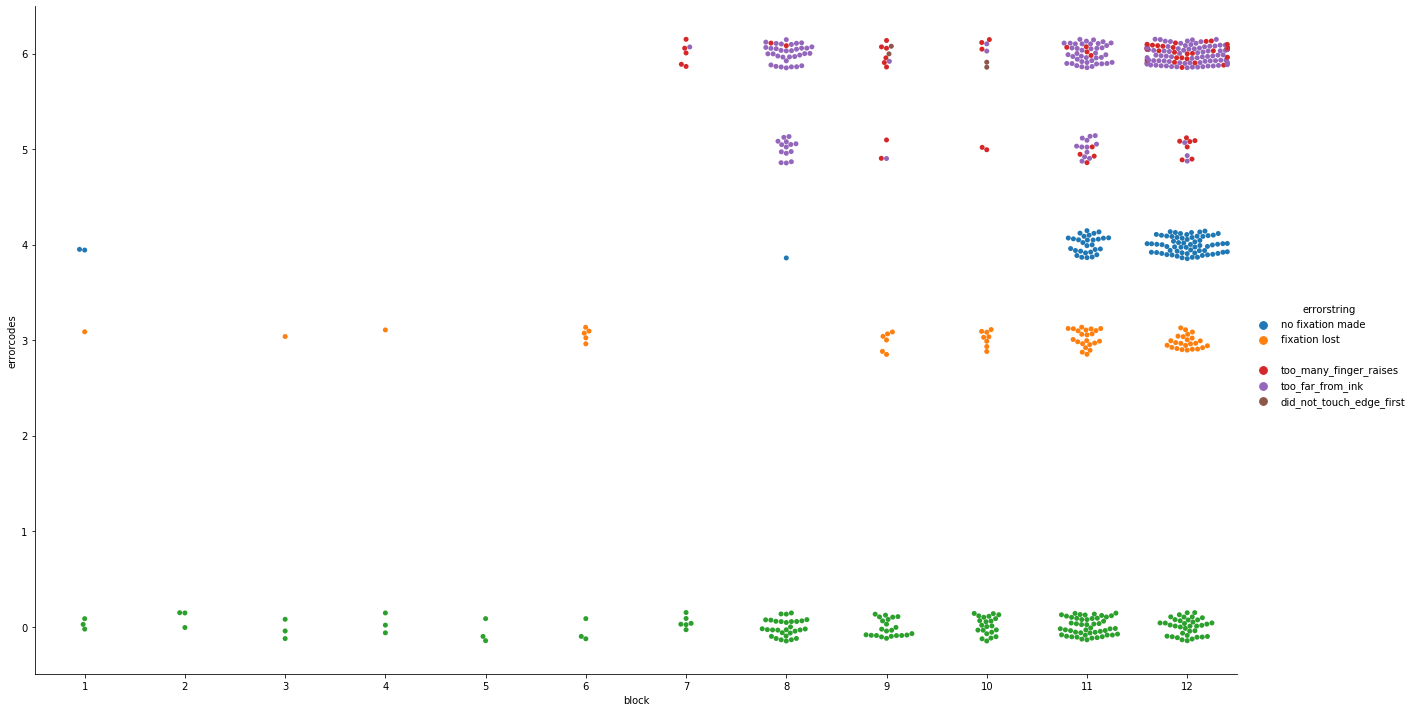

<Figure size 1080x360 with 0 Axes>

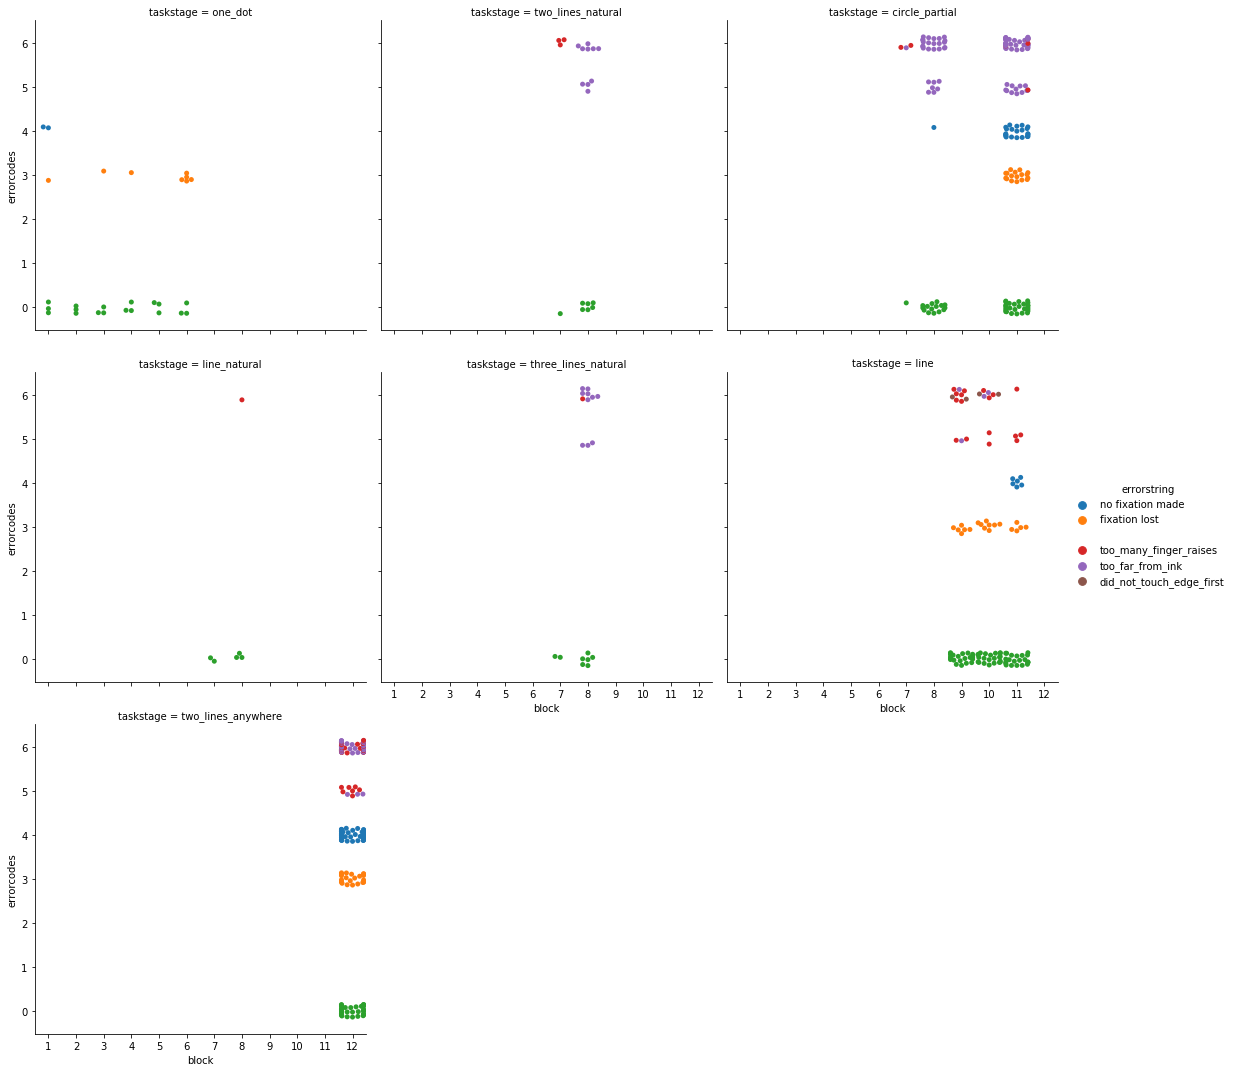

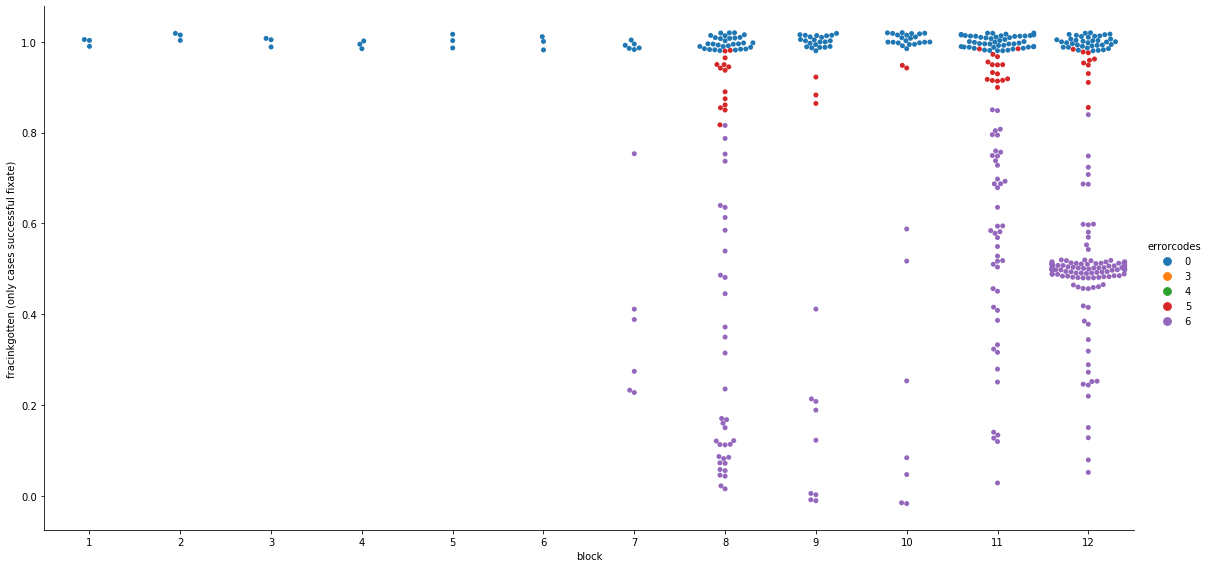

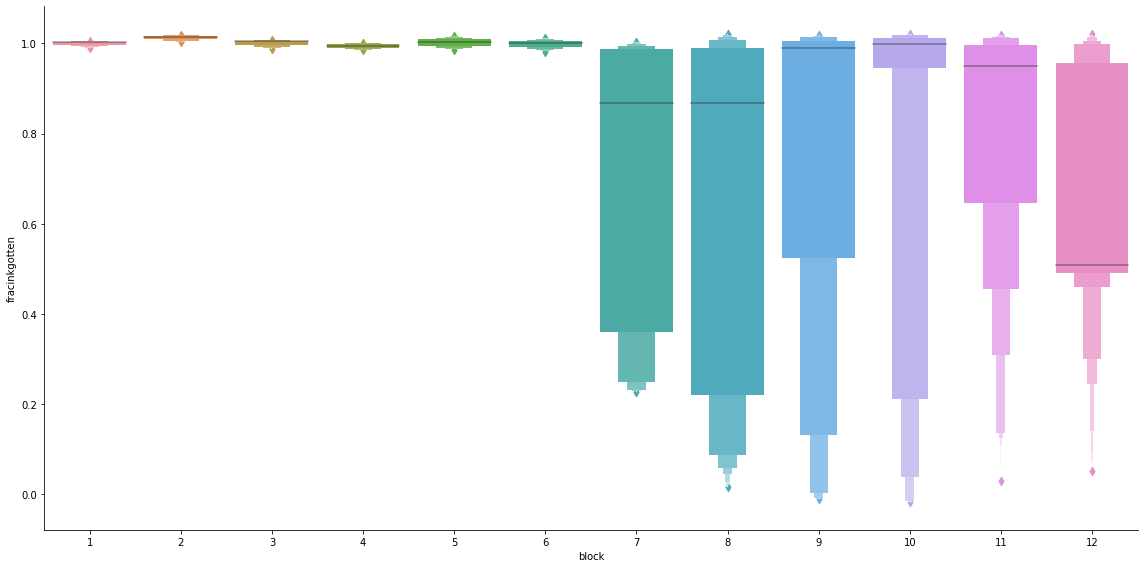

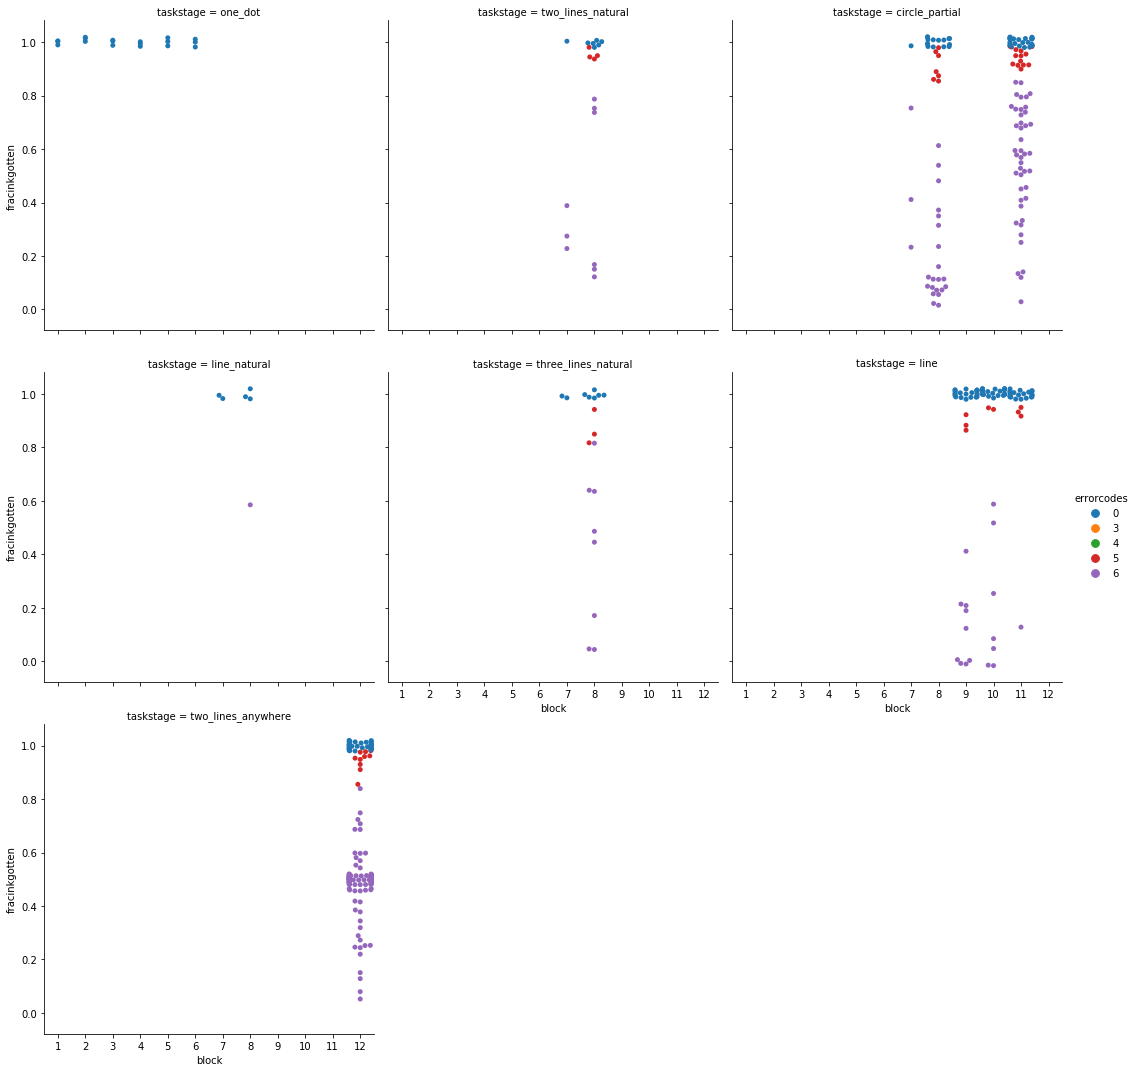

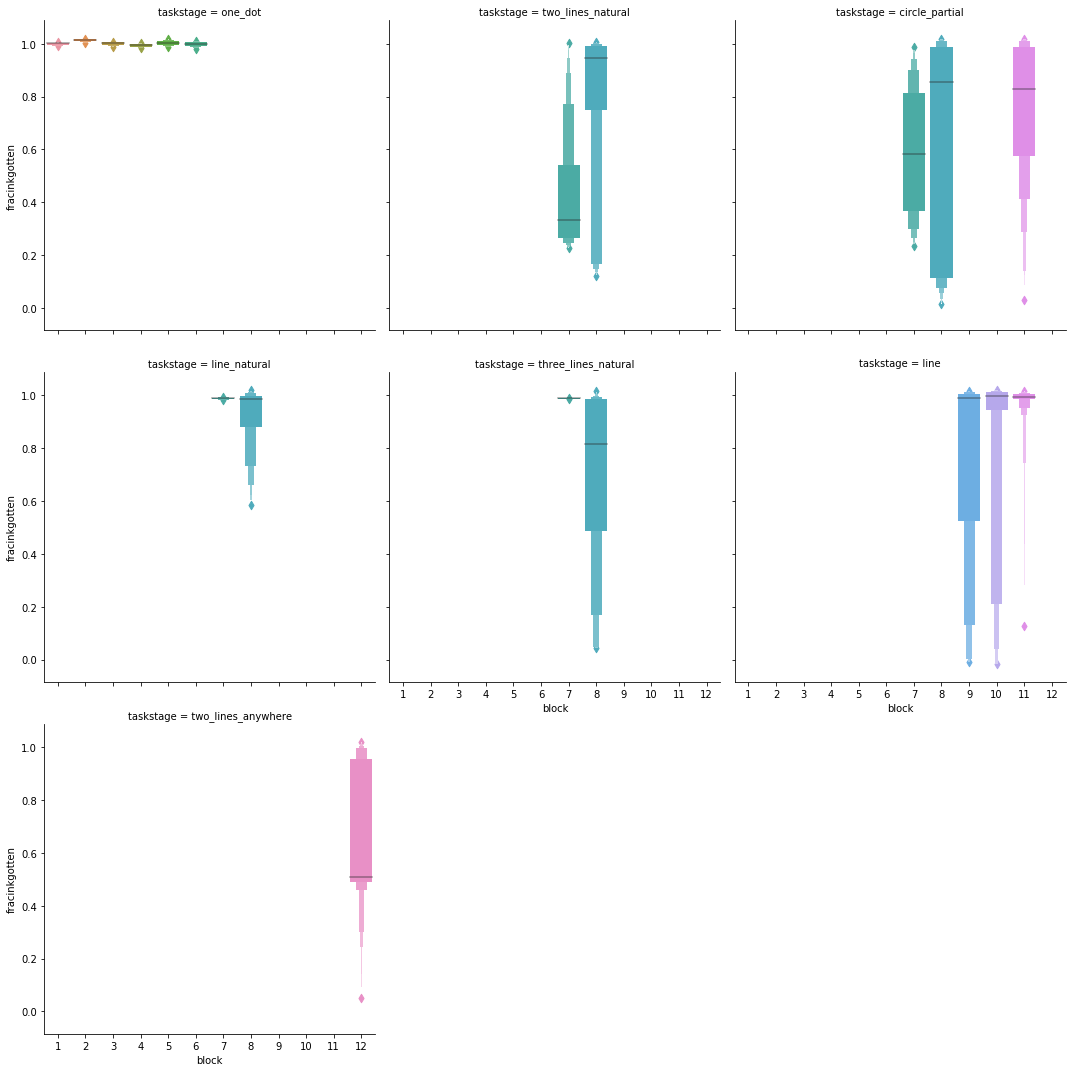

In [1104]:
# ==== just useful overview plots for this dataset
plotOverviewSession(filedata)
df = extractSessionDf(filedata)
print(df)
plotAnalySessionOverview(df, filedata)

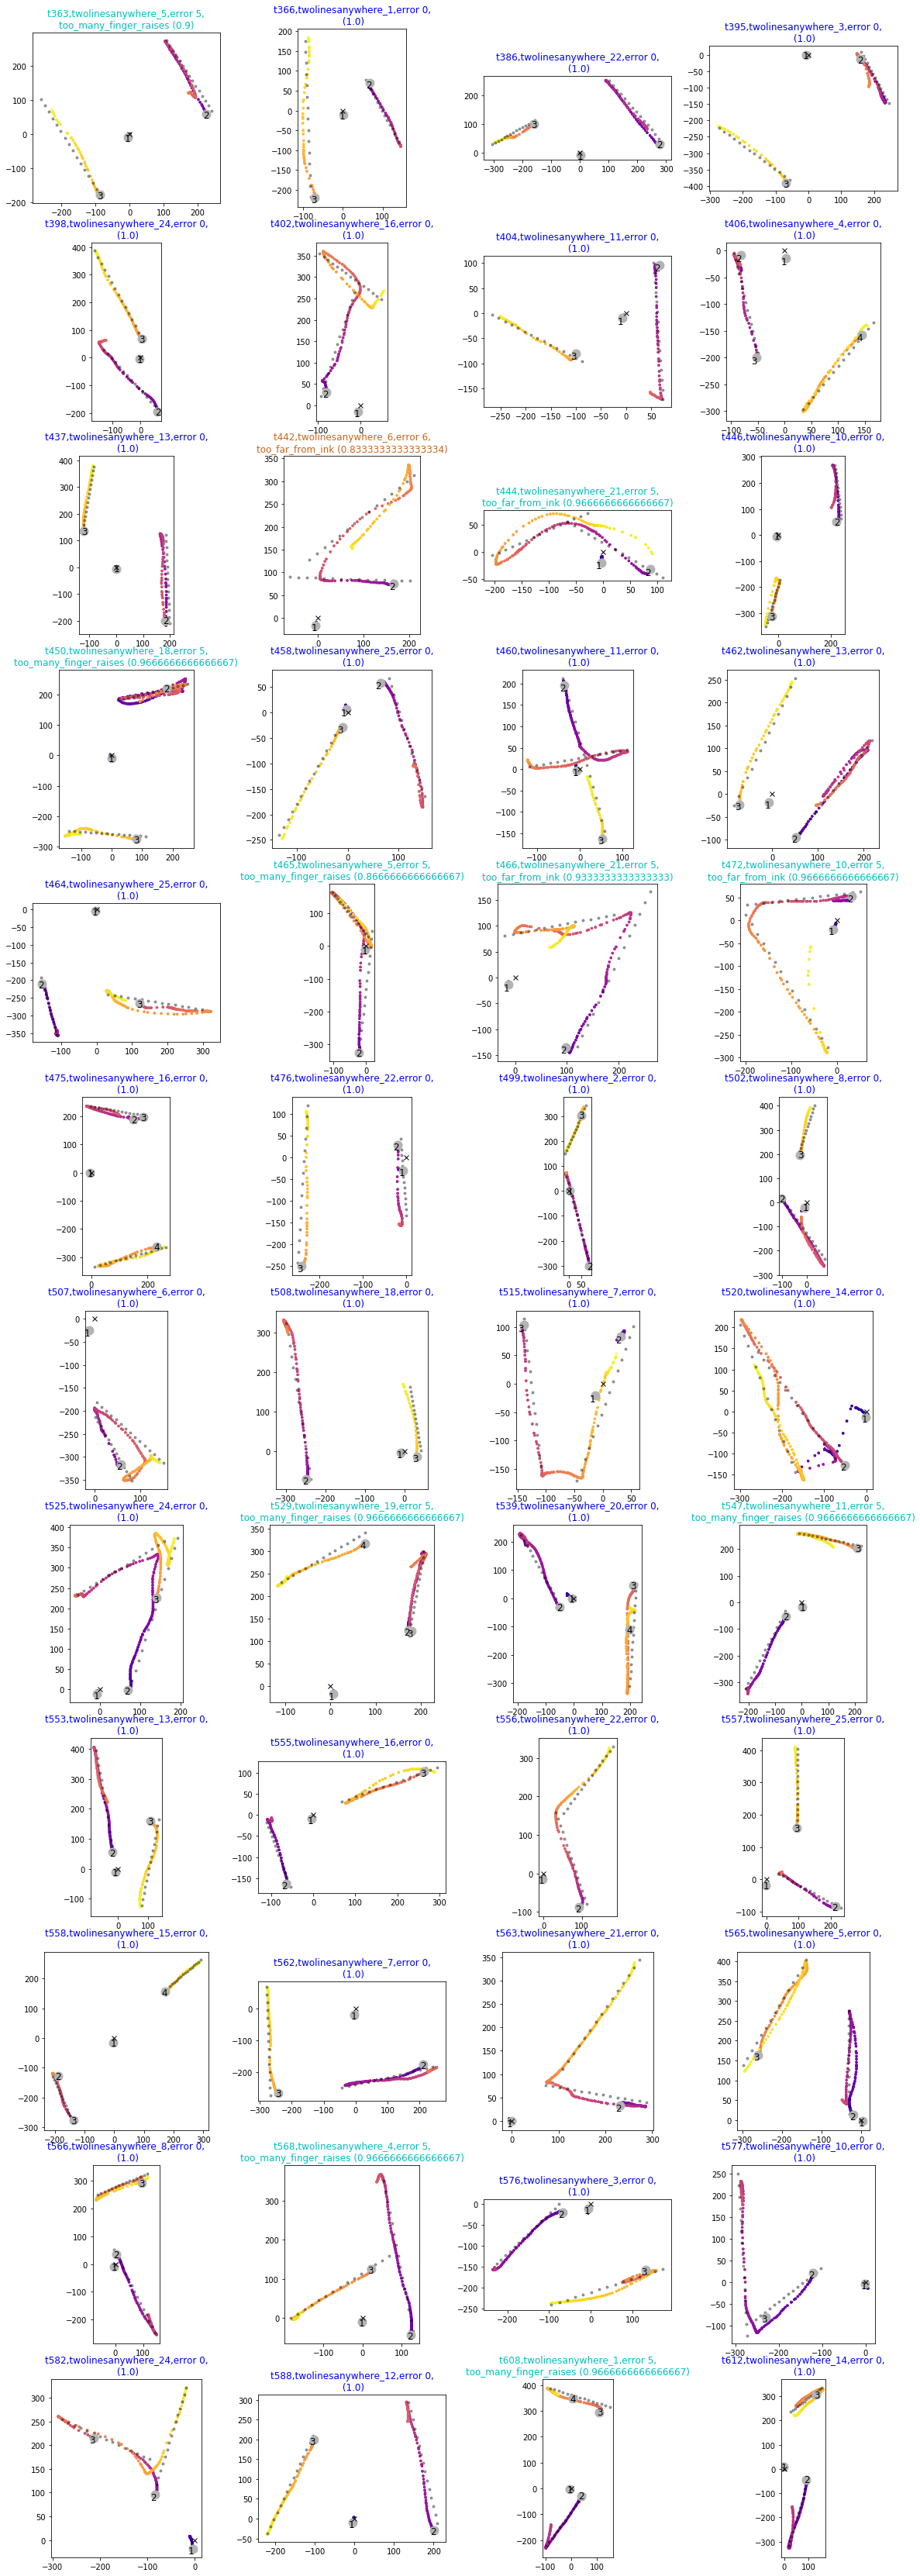

In [1412]:
# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them

targ = {
    "task_stage":["two_lines_anywhere"],
    "fracsuccess_min":[0.8]
}

trials_list = getIndsTrials(filedata, targ)

plotMultTrialsSimple(filedata, trials_list, zoom=True) 


In [1413]:
# === extract trials
targ = {
    "task_stage":["two_lines_anywhere"],
    "fracsuccess_min":[0.8]
}
trials_list = getIndsTrials(filedata, targ)

# 1) Preprocess data
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
# stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all", ver="from_first_touch")
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_orig",
                                  replace_key_to_do=True)
stroke_dict = processAngles(stroke_dict, stroke_to_use="all_strokes")



removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than

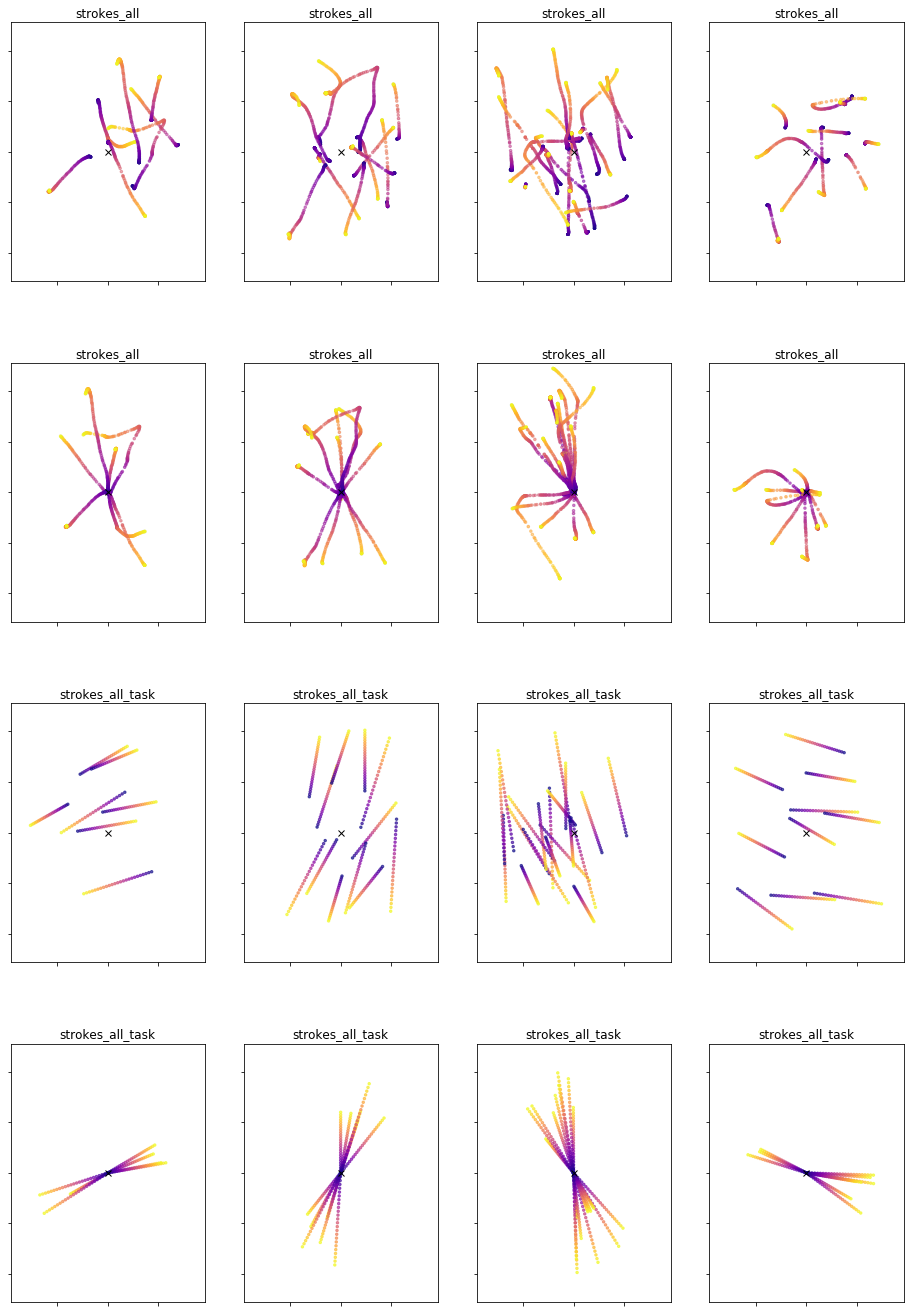

In [1414]:
row, col= 4,4
fig, axes = plt.subplots(row, col, figsize=(row*4, col*6))
for i, a in enumerate([[1,5], [2,6], [3,7], [4,8]]):
    
    # 2) Pull out variables
    filterdict = {
        "angle_bin_task_first_stroke":a}
    stroke_dict_plot = processFilterDat(stroke_dict, filterdict)

    for j, stroketype in enumerate(["strokes_all", "strokes_all_task"]):
        # 1) not centered
        plotDictCanvasOverlay(stroke_dict_plot, filedata, stroketype, 
                      title=stroketype, strokes_to_plot="first", ax=axes[j*2][i])

        # 2) centered
        plotDictCanvasOverlay(stroke_dict_plot, filedata, stroketype, 
                      title=stroketype, strokes_to_plot="first",
                     align_by="onset", ax=axes[j*2+1][i])

removing stroke since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime


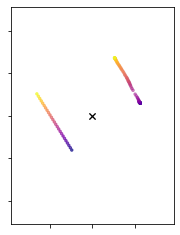

In [1428]:
## [TeST] ======== PLOT DISTRIBUTION OF TOUCH ONSETS RELATIVE TO TASK 
# 1) Preprocess data
stroke_dict = getMultTrialsStrokeDict(filedata, [trials_list[0]])
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_first_touch",
                                  replace_key_to_do=True)
# 3) set subsequent strokes to follow from teh first stroke
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_end_of_previous_stroke",
                                  replace_key_to_do=True)
stroke_dict = processAngles(stroke_dict)


stroke_dict_plot = stroke_dict

# == 1) Plot in original space, trials + first touch point
ax = plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all_task", 
                      title="", strokes_to_plot="first", 
                     plotver="one_color")

# plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first_touch", 
#                      plotver="one_color", ax=ax)

plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all", 
                      title="", strokes_to_plot="first", 
                     plotver="one_color", ax=ax)

removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than window
removing stroke since shorter than

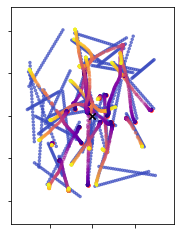

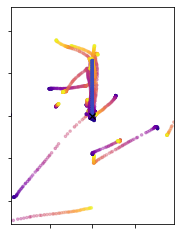

In [1416]:
## [GOOD] ======== PLOT DISTRIBUTION OF TOUCH ONSETS RELATIVE TO TASK 
# 1) get data
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
# 2) first set first stroke to start from closer to where first touched.
# stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all", ver="from_first_touch")
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_first_touch",
                                  replace_key_to_do=True)
# 3) set subsequent strokes to follow from teh first stroke
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_end_of_previous_stroke",
                                  replace_key_to_do=True)
# 4) get angles for each stroke
stroke_dict = processAngles(stroke_dict)

# --- filter by angle between first and second strokes.
# stroke_dict = processFilterDat(stroke_dict, {"relative_angle_task_first_two_strokes":[-pi,0]})
stroke_dict = processFilterDat(stroke_dict, {"relative_angle_task_first_two_strokes":[0,pi]})

ALIGN_BY = "onset_task"
ROTATE_BY = "task_first_stroke"
SCALE_BY = "task_first_stroke"

# == 1) Plot in original space, trials + first touch point
ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                      title="", strokes_to_plot="all", 
                     plotver="onecolor")

plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                      title="", strokes_to_plot="first_touch", 
                     plotver="onecolor", ax=ax)

plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                      title="", strokes_to_plot="first", 
                     plotver="raw", ax=ax)

# == 2) Plot touch, aligned to origin 
ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                      title="", strokes_to_plot="first", 
                     plotver="raw", align_by=ALIGN_BY, scale_by=SCALE_BY,
                     rotate_by=ROTATE_BY, alpha_force=0.1)

plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                      title="", strokes_to_plot="first", 
                     plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                          rotate_by=ROTATE_BY, alpha_force=0.2, ax=ax)

# plt.plot([0, 0], [-200, 200], '-k')

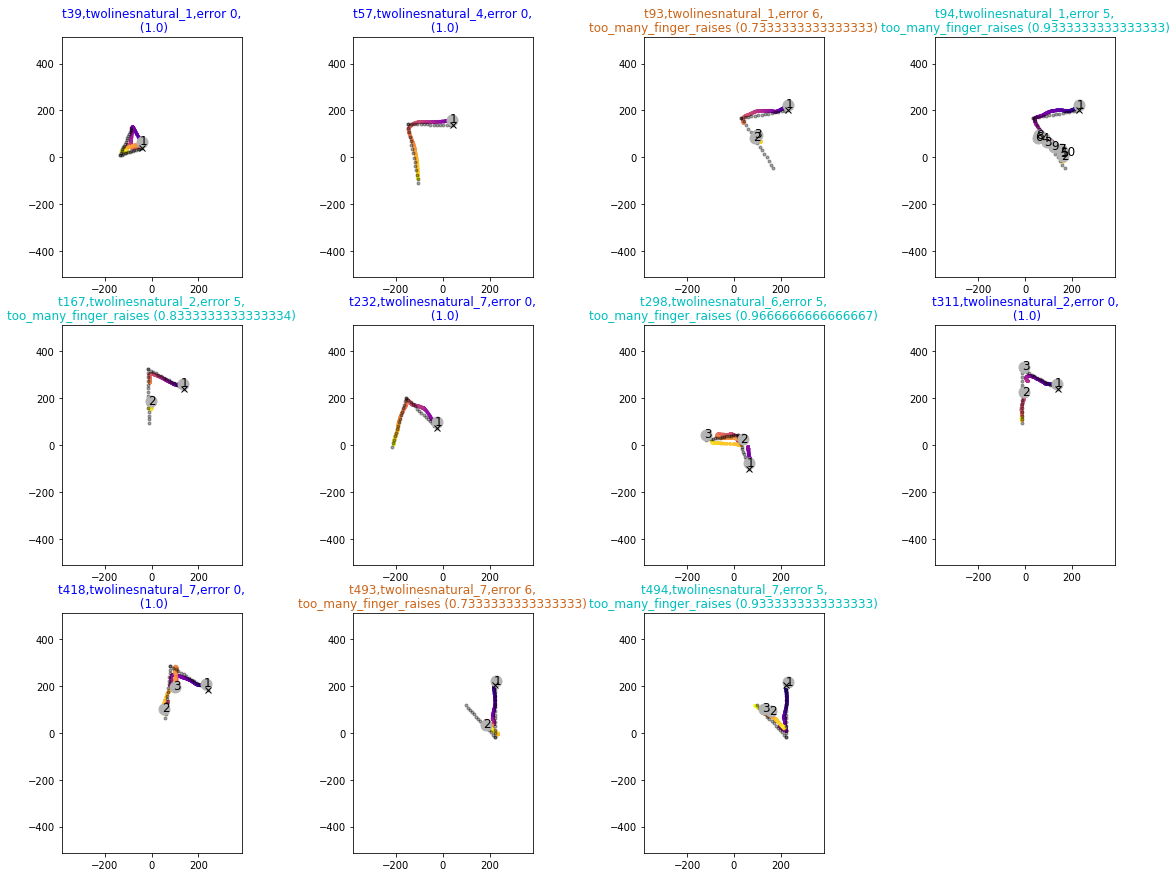

In [1352]:
stroke_dict_plot = processFilterDat(stroke_dict, {"relative_angle_task_first_two_strokes":[0,pi]})
stroke_dict_plot["trials_list"]
plotMultTrialsSimple(filedata, stroke_dict_plot["trials_list"])

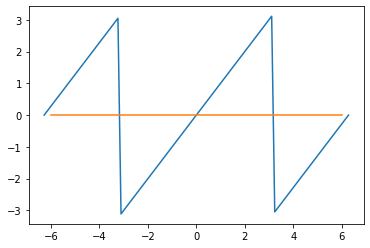

In [1345]:
x = np.linspace(-2*pi, 2*pi, 100)

y = (x + np.pi) % (2 * np.pi) - np.pi

plt.figure()
plt.plot(x, y)
plt.plot([-6, 6], [0,0])

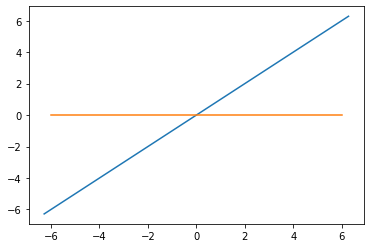

In [1344]:
y = np.unwrap(x)
plt.figure()
plt.plot(x, y)
plt.plot([-6, 6], [0,0])

In [ ]:
# == 2) Do rotation
# - (v1) transform all coords so that position of ground truth onset
# is at (0, 0)

# - (v2) transform all coords so that position of closest point in 
# ground truth task is at (0,0)



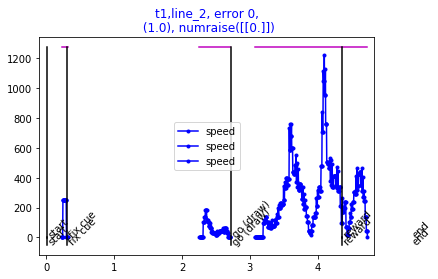

In [36]:
# --- segment strokes based on velocity minima

plotTrialSimpleTimecourse(filedata, 1, plotver="speed")

removing stroke since shorter than window


(-450.0, 270.0)

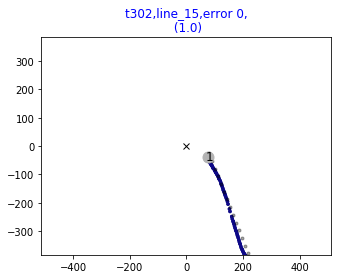

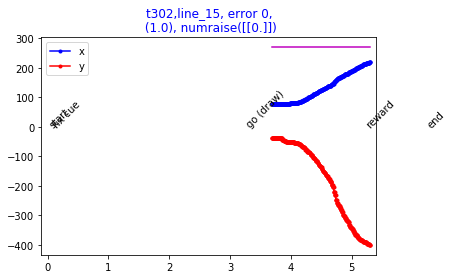

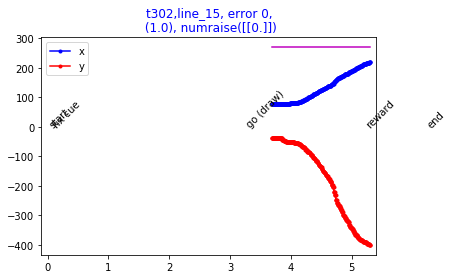

In [679]:
trial = random.sample(trials_list, 1)[0]

from tools.utils import getTrialsStrokesClean

strokes_new = getTrialsStrokesClean(filedata, trial, throw_out_first_stroke=True)

# plotTrialSimpleTimecourse(filedata, trial, plotver="speed")
# # plotDatStrokesTimecourse(vels, ax, plotver="speed")
# plt.plot(np.array(pausetimes), np.zeros((len(pausetimes),)), 'or');
# plotTrialSimple(filedata, trial)    

ax = plotTrialSimple(filedata, trial, plotver="empty")[0]
plotDatStrokes(strokes_new, ax, plotver="strokes")

ax = plotTrialSimpleTimecourse(filedata, trial, plotver="empty")
plotDatStrokesTimecourse(strokes_new, ax, plotver="raw")

ax = plotTrialSimpleTimecourse(filedata, trial, plotver="empty")
plotDatStrokesTimecourse([strokes_new[0]], ax, plotver="raw")


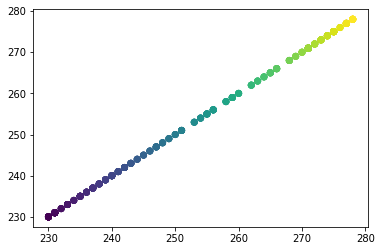

In [380]:
plt.scatter(np.array([ss for s in strokes_new for ss in s])[:,1], np.array([ss for s in strokes_new for ss in s])[:,1], c=np.array([ss for s in strokes_new for ss in s])[:,1])

In [369]:
strokes_new[0][:,0]

array([  12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,
         12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,
         12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,   12.,
         12.,   12.,   14.,   14.,   14.,   14.,   14.,   14.,   14.,
         14.,   14.,   14.,   14.,   14.,   14.,   13.,   13.,   13.,
         13.,   13.,   13.,   13.,   13.,   12.,   12.,   12.,   12.,
         11.,   11.,   11.,   11.,   11.,   11.,   11.,   11.,   10.,
         10.,   10.,   10.,   10.,    9.,    9.,    9.,    9.,    7.,
          7.,    7.,    7.,    7.,    7.,    7.,    7.,    5.,    5.,
          5.,    5.,    2.,    2.,    2.,    2.,    1.,    1.,    1.,
          1.,    1.,   -1.,   -1.,   -1.,   -1.,   -4.,   -4.,   -4.,
         -4.,   -8.,   -8.,   -8.,   -8.,   -9.,   -9.,   -9.,   -9.,
        -13.,  -13.,  -13.,  -13.,  -17.,  -17.,  -17.,  -17.,  -17.,
        -21.,  -21.,  -21.,  -21.,  -23.,  -23.,  -23.,  -23.,  -27.,
        -27.,  -27.,

(<matplotlib.axes._subplots.AxesSubplot at 0x7f373fcb4850>, None)

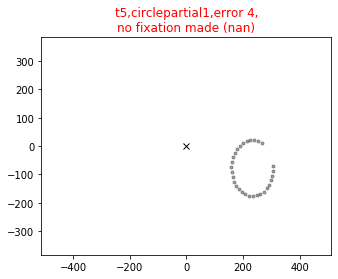

In [231]:
plotTrialSimple(filedata, 5)

[]
{'peak_heights': array([], dtype=float64), 'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[337]
{'peak_heights': array([-7.82741995]), 'prominences': array([135.18106347]), 'left_bases': array([175]), 'right_bases': array([375])}


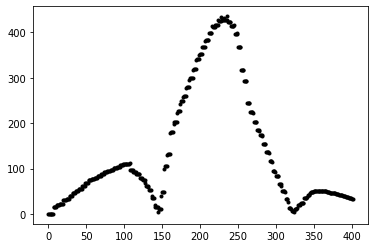

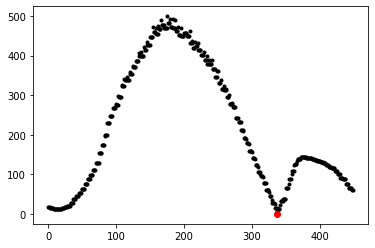

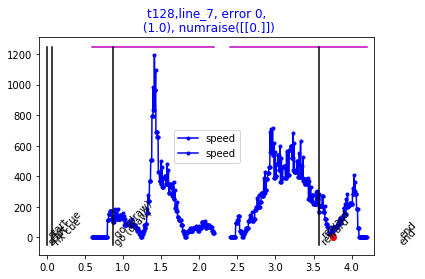

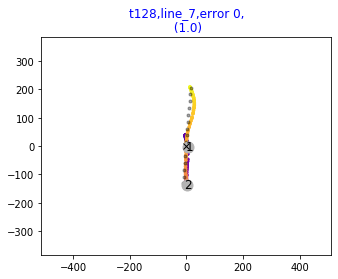

In [653]:
import random
t = random.sample(trials_list, 1)[0]

from tools.utils import getTrialsSpeedMinima

for t in [t]:
    pauses_time = getTrialsSpeedMinima(filedata, t)
    plotTrialSimpleTimecourse(filedata, t, plotver="speed")
    # plotDatStrokesTimecourse(vels, ax, plotver="speed")
    plt.plot(np.array(pauses_time), np.zeros((len(pauses_time),)), 'or');
    plotTrialSimple(filedata, t)    

In [170]:
pauses_time

[array([5.898])]

In [161]:
pauses_time

[array([], dtype=float64), array([], dtype=float64)]

In [159]:
find_peaks_cwt(-vels[0][:,0], np.arange(1, 30))

array([ 62, 115, 216, 297, 351, 496, 565])

-39.57473941796222

[196 342]
{'prominences': array([263.00648818, 133.93091274]), 'left_bases': array([140, 277]), 'right_bases': array([275, 400])}


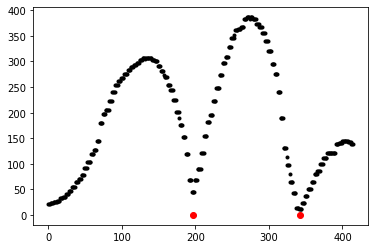

In [93]:
from scipy.signal import find_peaks, find_peaks_cwt


v = vels[0][:,0]

prom = (max(v)-min(v))/4

dist = 4
peaks, properties = find_peaks(-v, prominence=prom, distance=dist)
print(peaks)
print(properties)


plt.figure()
plt.plot(v, '.k')
plt.plot(peaks, np.zeros(peaks.shape), 'or')

In [ ]:
from scipy.signal import find_peaks, find_peaks_cwt

find_peaks_cwt

In [23]:
tasks_all[0]["x_rescaled"]

array([[  0.55315688,  11.92676434,  23.30037181,  34.67397928,
         46.04758675,  57.42119422,  68.79480169,  80.16840916,
         91.54201663, 102.9156241 , 114.28923157, 125.66283904,
        137.03644651, 148.41005398, 159.78366144]])

TypeError: string indices must be integers

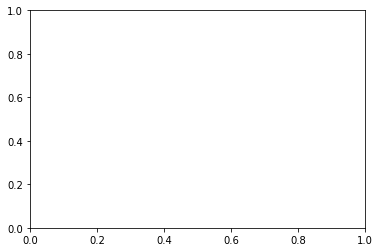

In [20]:
plt.figure()
ax = plt.subplot(1,1,1)
plotDatStrokes(tasks_all[0], ax)

In [12]:
strokes_all[0]

[array([[-14.   , -10.   ,   2.628],
        [-14.   , -10.   ,   2.632],
        [-14.   , -10.   ,   2.636],
        [-14.   ,  -9.   ,   2.64 ],
        [-14.   ,  -9.   ,   2.644],
        [-14.   ,  -9.   ,   2.648],
        [-14.   ,  -9.   ,   2.652],
        [-15.   ,  -8.   ,   2.656],
        [-15.   ,  -8.   ,   2.66 ],
        [-15.   ,  -8.   ,   2.664],
        [-15.   ,  -8.   ,   2.668],
        [-15.   ,  -8.   ,   2.672],
        [-15.   ,  -8.   ,   2.676],
        [-15.   ,  -8.   ,   2.68 ],
        [-15.   ,  -8.   ,   2.684],
        [-15.   ,  -8.   ,   2.688],
        [-15.   ,  -8.   ,   2.692],
        [-15.   ,  -8.   ,   2.696],
        [-15.   ,  -8.   ,   2.7  ],
        [-15.   ,  -8.   ,   2.704],
        [-15.   ,  -8.   ,   2.708],
        [-15.   ,  -8.   ,   2.712],
        [-15.   ,  -8.   ,   2.716]]), array([[ 129.   , -195.   ,    3.076],
        [ 129.   , -195.   ,    3.08 ],
        [ 129.   , -195.   ,    3.084],
        ...,
        [ 157. 